In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from matplotlib import pyplot as plt
import pandas as pd

import absl.logging
absl.logging.set_verbosity(absl.logging.ERROR)

import sys  
sys.path.insert(0, '../')
import RadonDF_Handler

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [25]:
X1, y1 = RadonDF_Handler.Handler(1)
X2, y2 = RadonDF_Handler.Handler(2)
X3, y3 = RadonDF_Handler.Handler(3)
X4, y4 = RadonDF_Handler.Handler(4)
X5, y5 = RadonDF_Handler.Handler(5)
X6, y6 = RadonDF_Handler.Handler(6)

In [29]:
print(X1.shape, y1.shape)
print(X2.shape, y2.shape)
print(X3.shape, y3.shape)
print(X4.shape, y4.shape)
print(X5.shape, y5.shape)
print(X6.shape, y6.shape)

(115628, 6, 5) (115628,)
(115627, 6, 5) (115627,)
(115626, 6, 5) (115626,)
(115625, 6, 5) (115625,)
(115624, 6, 5) (115624,)
(115623, 6, 5) (115623,)


In [6]:
X_train, y_train = X1[:92508], y1[:92508] # training data
X_val, y_val = X1[92508:95508], y1[92508:95508] #validation
X_test, y_test = X1[95508:], y1[95508:] #test
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((92508, 6, 5), (92508,), (3000, 6, 5), (3000,), (20120, 6, 5), (20120,))

In [7]:
model = Sequential()
model.add(InputLayer((6, 5)))
model.add(LSTM(64))
model.add(Dense(8, 'relu'))
model.add(Dense(1, 'linear'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                17920     
_________________________________________________________________
dense (Dense)                (None, 8)                 520       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 18,449
Trainable params: 18,449
Non-trainable params: 0
_________________________________________________________________


In [8]:
cp = ModelCheckpoint('1H_ForecastModel/', save_best_only=True, save_format="h5")
model.compile(loss=MeanSquaredError(), 
               optimizer=Adam(learning_rate=0.0001), 
               metrics=[RootMeanSquaredError()])
               #metrics=[MeanAbsoluteError()])

In [9]:
model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, callbacks=[cp])

Epoch 1/10
2891/2891 [==============================] - 21s 6ms/step - loss: 1622486.7500 - root_mean_squared_error: 1273.7687 - val_loss: 303090.1875 - val_root_mean_squared_error: 550.5363
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 2/10
2891/2891 [==============================] - 18s 6ms/step - loss: 1569481.8750 - root_mean_squared_error: 1252.7897 - val_loss: 260110.0938 - val_root_mean_squared_error: 510.0099
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 3/10
2891/2891 [==============================] - 16s 6ms/step - loss: 1500603.5000 - root_mean_squared_error: 1224.9912 - val_loss: 207682.8594 - val_root_mean_squared_error: 455.7224
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 4/10
2891/2891 [==============================] - 16s 6ms/step - loss: 1418099.1250 - root_mean_squared_error: 1190.8397 - val_loss: 154497.9688 - val_root_mean_squared_error: 393.06230000 - root
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 5/10
2891/2891 [==============================] - 16s 6ms/step - loss: 1329614.3750 - root_mean_squared_error: 1153.0891 - val_loss: 106015.6406 - val_root_mean_squared_error: 325.6004
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 6/10
2891/2891 [==============================] - 16s 6ms/step - loss: 1234165.7500 - root_mean_squared_error: 1110.9302 - val_loss: 65981.4062 - val_root_mean_squared_error: 256.8685
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 7/10
2891/2891 [==============================] - 16s 6ms/step - loss: 1137425.0000 - root_mean_squared_error: 1066.5013 - val_loss: 37906.6562 - val_root_mean_squared_error: 194.6963
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 8/10
2891/2891 [==============================] - 16s 5ms/step - loss: 1039445.6875 - root_mean_squared_error: 1019.5321 - val_loss: 21400.6211 - val_root_mean_squared_error: 146.2895
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 9/10
2891/2891 [==============================] - 16s 5ms/step - loss: 940980.5000 - root_mean_squared_error: 970.0415 - val_loss: 14216.5283 - val_root_mean_squared_error: 119.2331
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


Epoch 10/10
2891/2891 [==============================] - 16s 6ms/step - loss: 843027.3750 - root_mean_squared_error: 918.1652 - val_loss: 11445.4639 - val_root_mean_squared_error: 106.9835oot_mean_squared - ETA: 0s - loss: 843514.3750 - root_mean_squared_error: 91
INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


INFO:tensorflow:Assets written to: 1H_ForecastModel\assets


In [13]:
model = load_model('1H_ForecastModel/')

In [14]:
model.evaluate(X_test,y_test)

629/629 [==============================] - 2s 2ms/step - loss: 216483.9375 - root_mean_squared_error: 465.2784: 0s - loss: 75462.3750 - root_mean_squared_error:  - ETA: 0s - loss: 236465.8750 - root_


[216483.9375, 465.2783508300781]

In [17]:
plt.style.use('seaborn')

In [20]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})

In [21]:
test_results.head(30)

,Test Predictions,Actuals
0,918.228943,862.405000
1,819.202820,841.680000
2,822.557556,854.633333
3,830.619873,853.469000
4,824.903809,890.230000
5,854.758362,815.413333
6,777.366882,811.605455
7,787.952454,804.932500
8,770.266357,808.569167
9,786.193298,822.270909


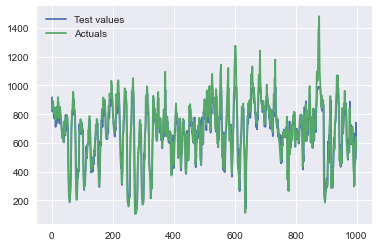

In [22]:
plt.plot(test_results['Test Predictions'][:1000])
plt.plot(test_results['Actuals'][:1000])
plt.legend(['Test values','Actuals'])